## Project Team ID : PTID-CDS-FEB-24-1790
## Project ID : PRCP-1020
## Project Name: HOUSE PRICE PREDICTION ADVANCED REGRESSION

### BUSINESS CASE:

 * House Price Prediction: A Win-Win for Customers and Business
 * Problem: Inaccurate house pricing hurts both customers and company.
 * Solution: Develop a machine learning model to predict house prices with high accuracy.
 * Overall outcome : A smart investment that benefits everyone.


## DOMAIN ANALYSIS:



### Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Loading the data:

In [2]:
data=pd.read_csv('PRCP-1020-HousePricePred/Data/data.csv')
pd.set_option("display.max_columns",None)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Basic checks:

In [3]:
data.shape

(1460, 81)

In [4]:
print(list(data.columns))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### STATISTICAL MEASURE OF DATA

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Since no column is available since no column had a standad deviation of 0 

In [7]:
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There is also no constant column in the Categorical data 

# EXPLORATORY DATA ANALYSIS


#### Task 1:- Prepare a complete data analysis report on the given data.


# UNIVARIANT ANALYSIS

In [9]:
import sweetviz
sv = sweetviz.analyze(data)
sv.show_html() 

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
data.MSSubClass.value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

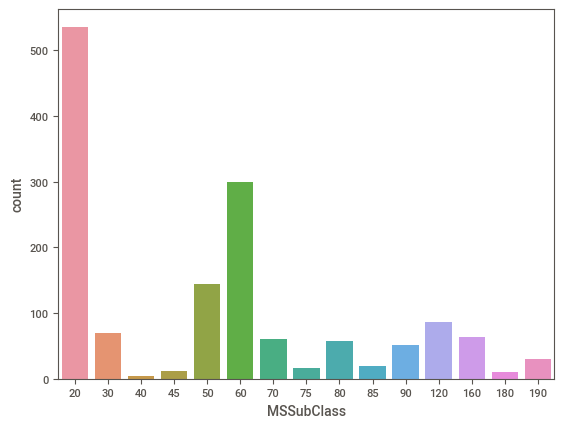

In [11]:
sns.countplot(x ='MSSubClass',data=data)
plt.show()

OBSERVATIONS:

1 MS SUBCLASS: The top 3 type of dwelling involved in the sales were majorly 20 (1-STORY 1946 & NEWER ALL STYLES) with 536 counts, 60 (2-STORY 1946 & NEWER) with 299 counts and 50 (1-1/2 STORY FINISHED ALL AGES) with 144 counts

2 MS ZONING: Residential Low Density (RL) zoning accounts for the most with 79% score.

3 LOT FRONTAGE: This ranged between 21 and 313 with an average of 70 feets

4 LOT AREA: This ranged between 1000 and 250,000 square feets with an average of 11,000

5 STREET: Pave type of road access accounted for 99% of the data while GRVL (gravel) was < 1%





In [12]:
data.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

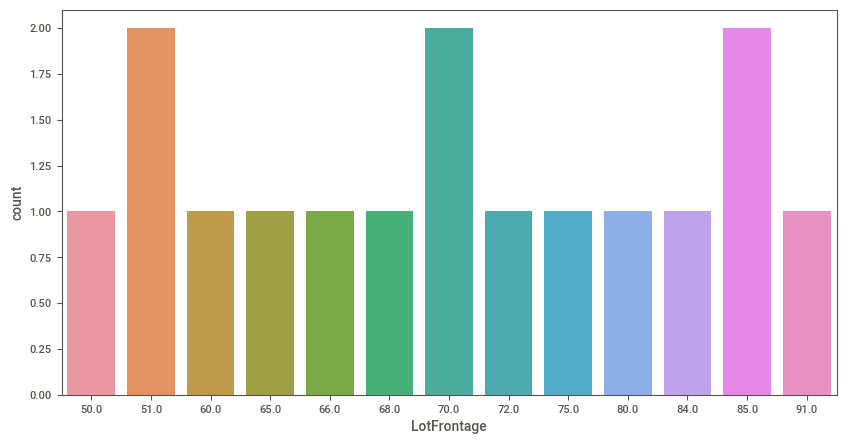

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x ='LotFrontage',data=data.head(20))
plt.show()

In [14]:
data.LotArea.value_counts()

LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64

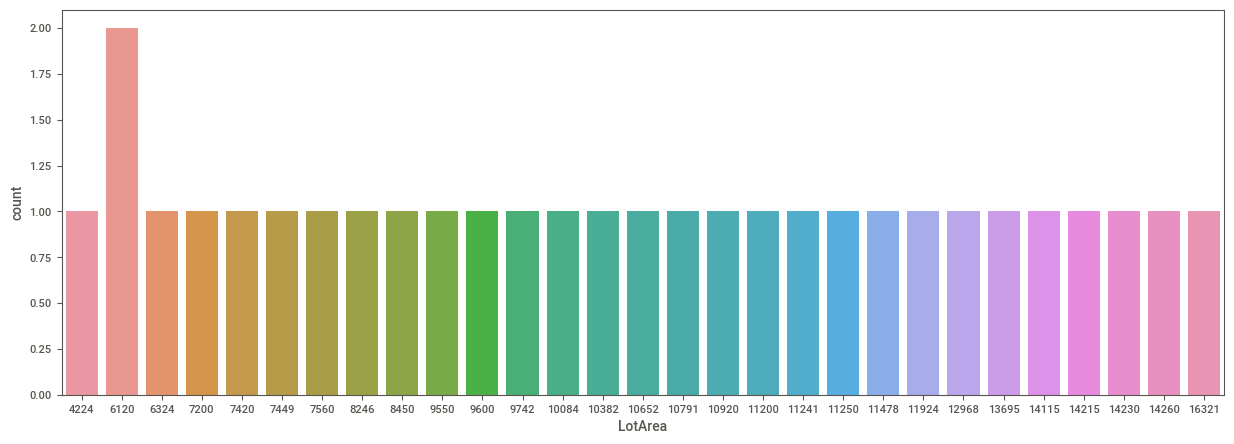

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x ='LotArea',data=data.head(30))
plt.show()

# BI-VARIATE ANALYSIS

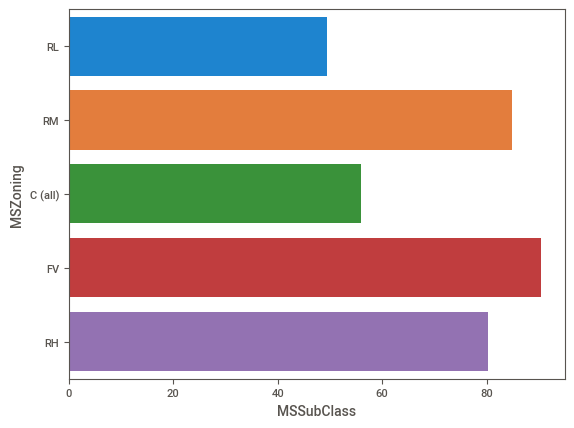

In [16]:
sns.barplot(x='MSSubClass',y='MSZoning',data=data,ci=None)
plt.show()

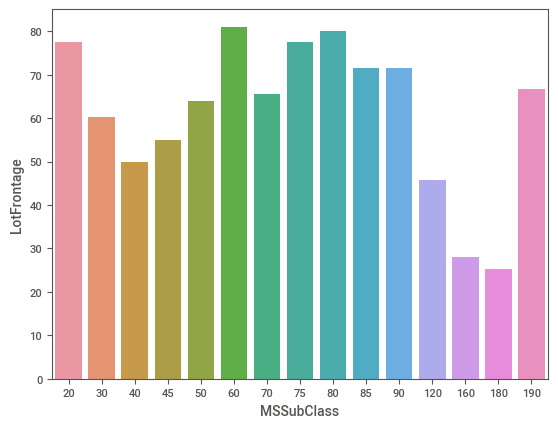

In [17]:
sns.barplot(x='MSSubClass',y='LotFrontage',data=data,ci=None)
plt.show()

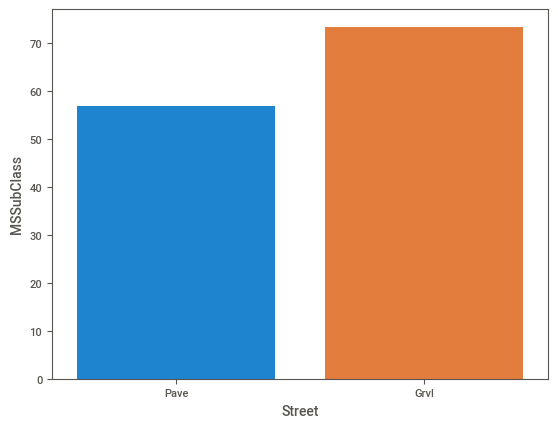

In [18]:
sns.barplot(x='Street',y='MSSubClass',data=data, ci=None)
plt.show()

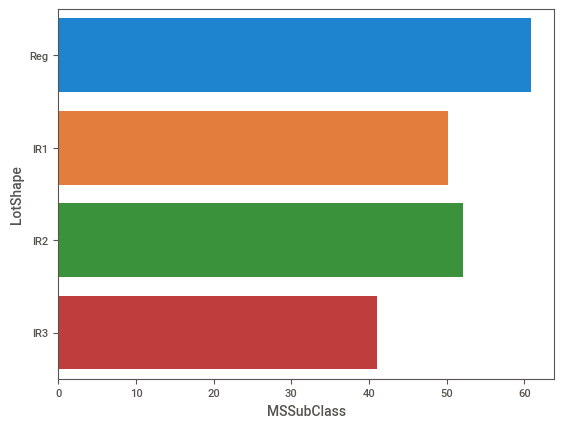

In [19]:
sns.barplot(x='MSSubClass',y='LotShape',data=data,ci=None)
plt.show()

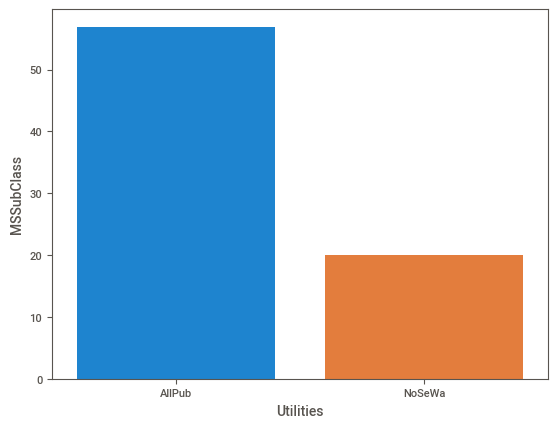

In [20]:
sns.barplot(y='MSSubClass',x='Utilities',data=data,ci=None)
plt.show()

OBSERVATION

More than 50 MSSubClass are connected with  AllPub (All public Utilities (E,G,W,& S)) and 20 MSSubClass are with NoSeWa (Electricity, Gas, and Water (Septic Tank))

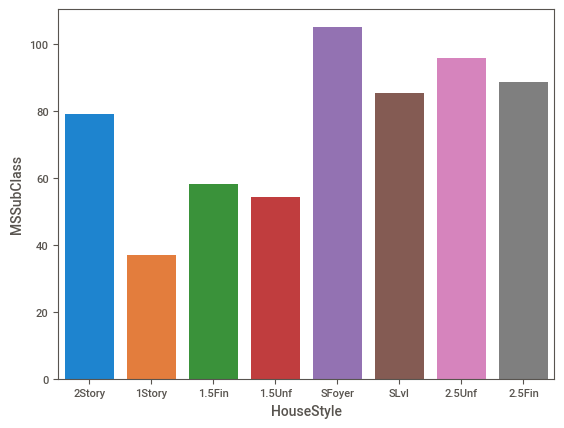

In [21]:
sns.barplot(x='HouseStyle',y='MSSubClass',data=data,ci=None)
plt.show()

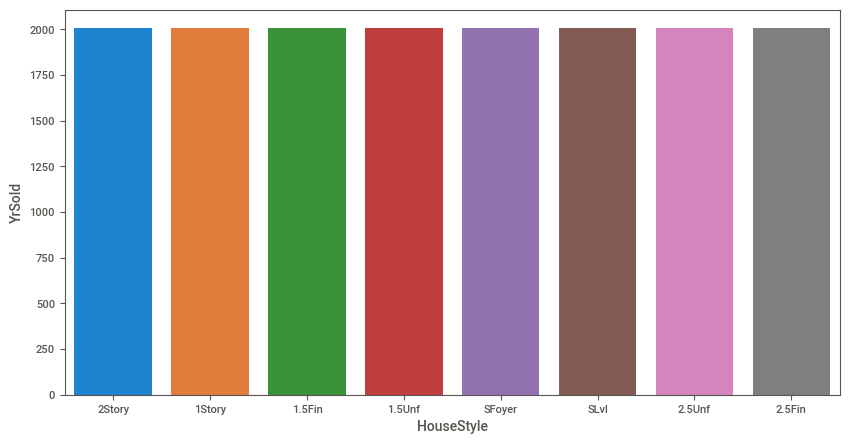

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='HouseStyle',y='YrSold',data=data,ci=None)
plt.show()

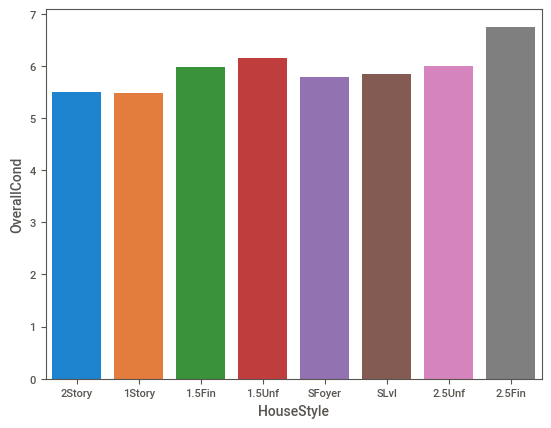

In [23]:
sns.barplot(x='HouseStyle',y='OverallCond',data=data,ci=None)
plt.show()

OBSERVATION

Majority of the housestyle are either 5 or above of it i.e.,Average or Above Average.

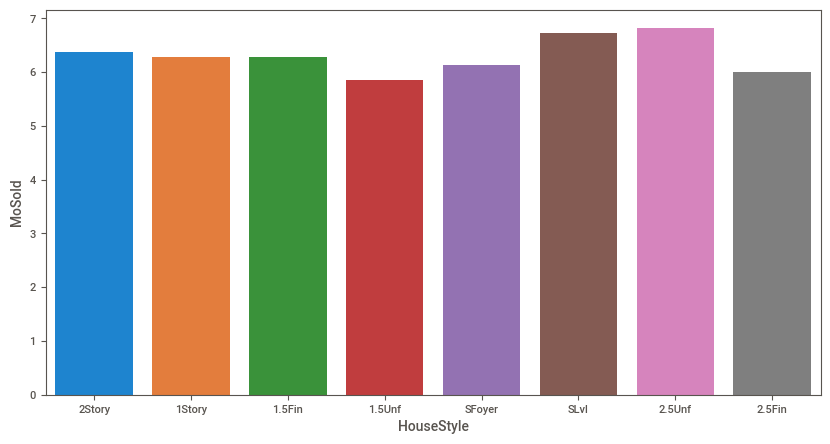

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='HouseStyle',y='MoSold',data=data,ci=None)
plt.show()

OBSERVATION 

2Story, 1Story, 1.5Fin ,SFoyer ,2.5Fin  were sold in the starting of 6th month.

1.5Unf was sold in the 5th month and SFoyer ,SLvl in the ending of 6th month.



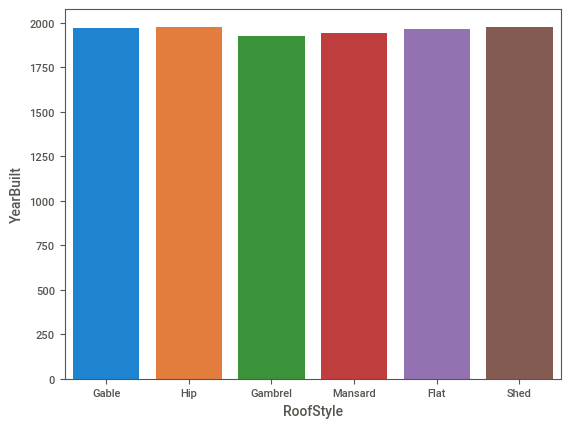

In [25]:
sns.barplot(x='RoofStyle',y='YearBuilt',data=data,ci=None)
plt.show()

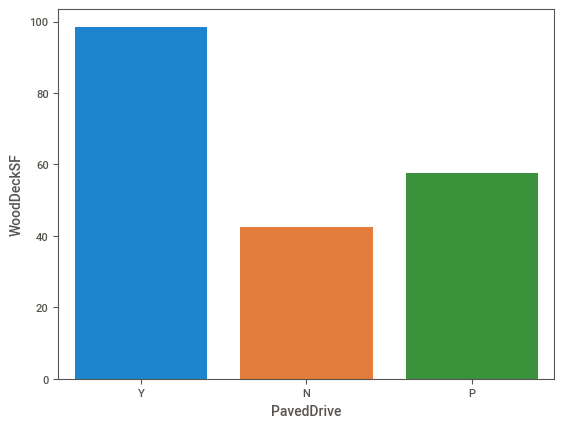

In [26]:
sns.barplot(x='PavedDrive',y='WoodDeckSF',data=data,ci=None)
plt.show()

OBSAERVATION

More than 80 sq.feet of area  is Paved, upto 40 sq.feet of  area is Partial Pavement  and 60 sq.feet of area is Dirt/Gravel

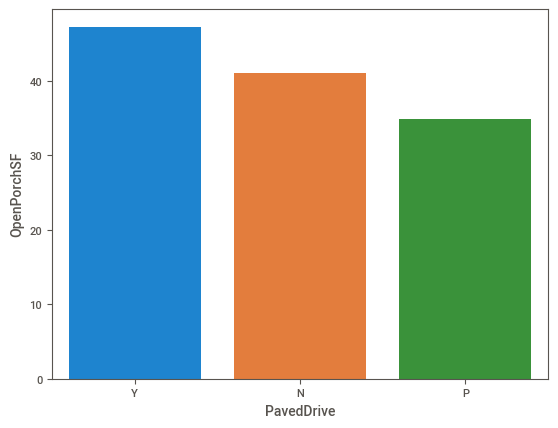

In [27]:
sns.barplot(x='PavedDrive',y='OpenPorchSF',data=data,ci=None)
plt.show()

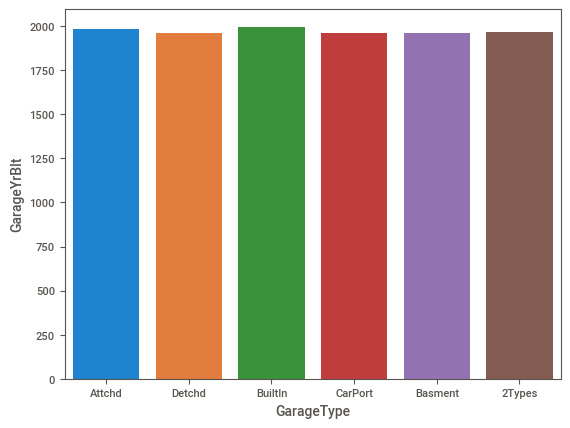

In [28]:
sns.barplot(x='GarageType',y='GarageYrBlt',data=data,ci=None)
plt.show()

OBSERVATION

Most of the garage were built between 1750-2000

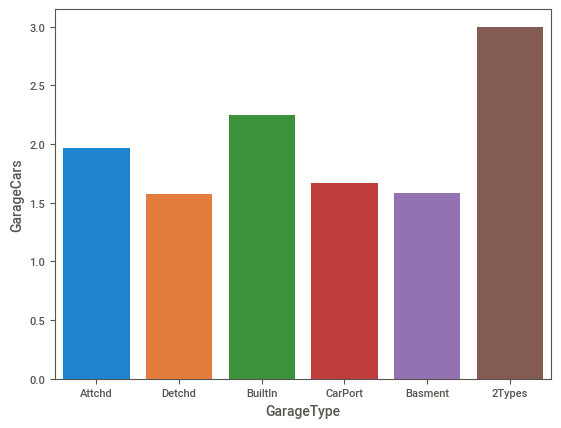

In [29]:
sns.barplot(x='GarageType',y='GarageCars',data=data,ci=None)
plt.show()

OBSERVATION

2Types garage has more car capacity as compared to others.

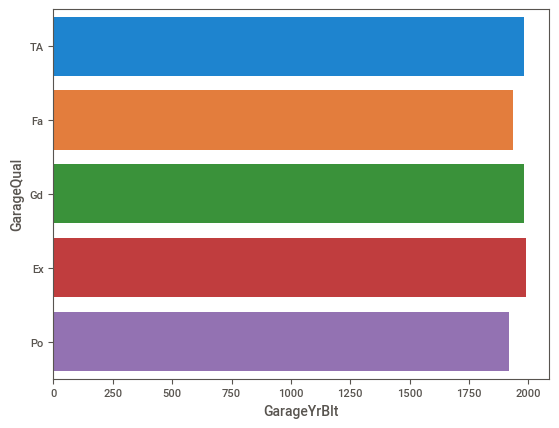

In [30]:
sns.barplot(x='GarageYrBlt',y='GarageQual',data=data,ci=None)
plt.show()

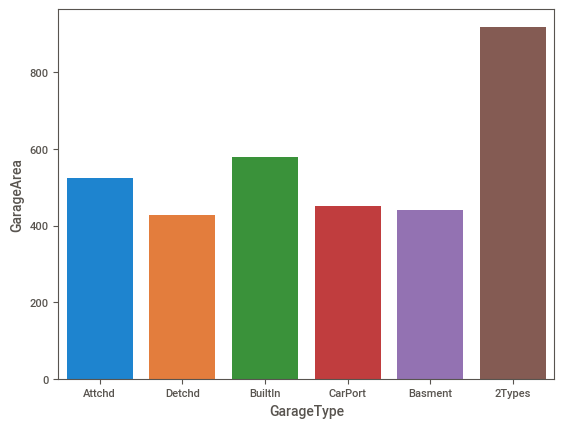

In [31]:
sns.barplot(x='GarageType',y='GarageArea',data=data,ci=None)
plt.show()

OBSERVATION

2Types garage has more area as compared to others.

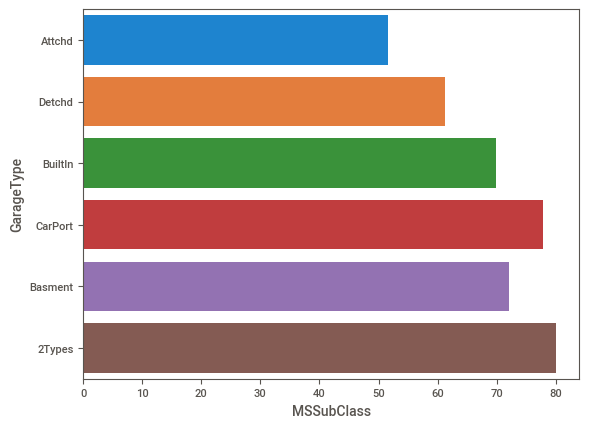

In [32]:
sns.barplot(x='MSSubClass',y='GarageType',data=data,ci=None)
plt.show()

OBSERVATION

80 dwelling(SPLIT OR MULTI-LEVEL) has 2Types of garage followed by 75(2-1/2 STORY ALL AGES) with CarPort of garage....50(1-1/2 STORY FINISHED ALL AGES)with Attchd type of garage.

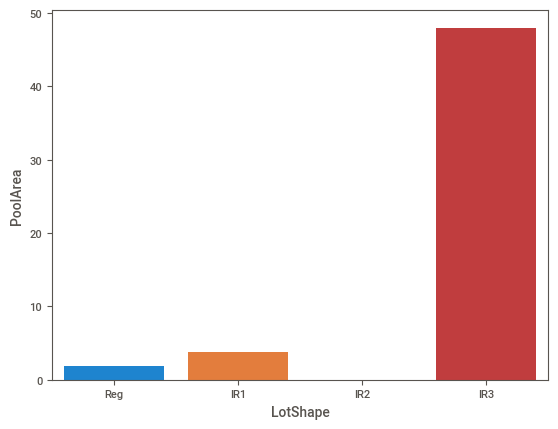

In [33]:
sns.barplot(x='LotShape',y='PoolArea',data=data,ci=None)
plt.show()

OBSERVATION

IR3 property has more poolarea as compared to Reg,IR1,IR2

### Task 2.B) ) Determine the relationship between the house features and how the price varies based on this.



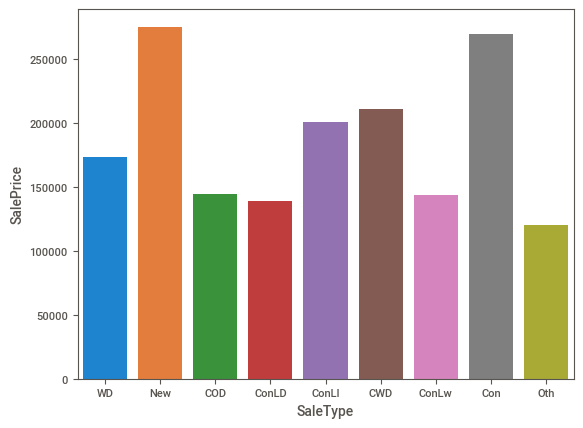

In [34]:
sns.barplot(x='SaleType',y='SalePrice',data=data,ci=None)
plt.show()

OBSERVATION

New(Home just constructed and sold)and Con(Contract 15% Down payment regular terms)have more salesprice as compared to rest of the saletype.

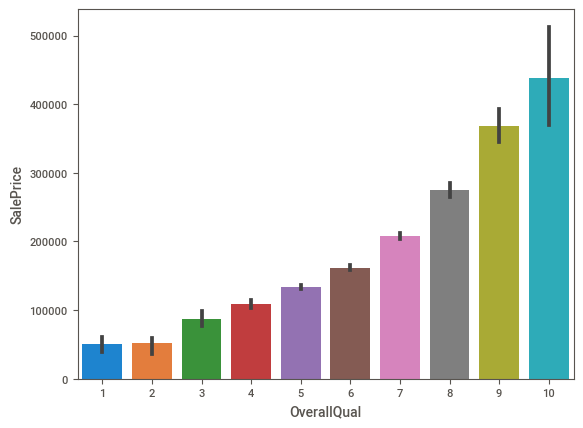

In [35]:
sns.barplot(x='OverallQual',y='SalePrice',data=data)
plt.show()

* Overall material and finish quality increases, then sale price also increases

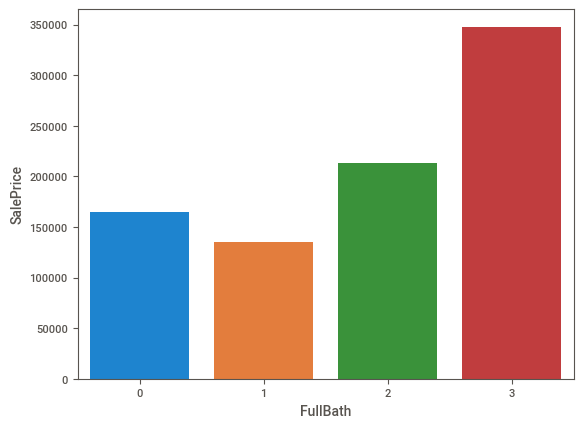

In [36]:
sns.barplot(x='FullBath',y='SalePrice',data=data,ci=None)
plt.show()

* Full Bathrooms above grade have high saleprice

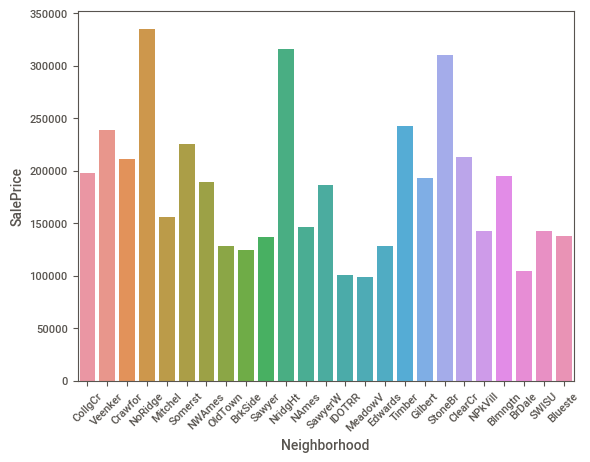

In [37]:
sns.barplot(x='Neighborhood',y='SalePrice',data=data,ci=None)
plt.xticks(rotation=45)
plt.show()
        

* Saleprice varies different Neighbourhood. High Saleprice house have neighbourhood of Crawfor,Sawyer, Gilbert and lowest neighbourhood is SawyerW and IDOTRR

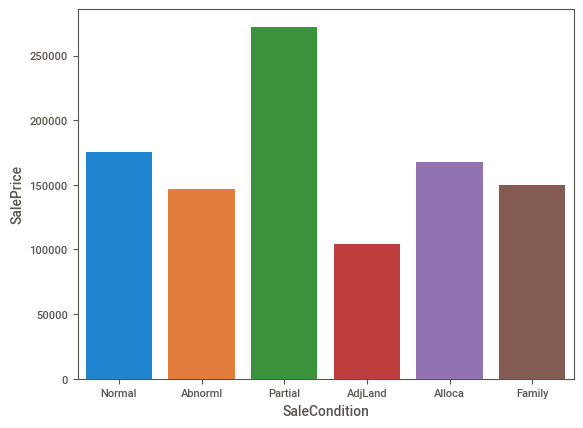

In [38]:
sns.barplot(x='SaleCondition',y='SalePrice',data=data,ci=None)
plt.show()

OBSERVATION

'The salesprice of Partial (Home was not completed when last assessed (associated with New Homes)) is more than of 2500000, followed by Normal and Alloca between 150000-200000.

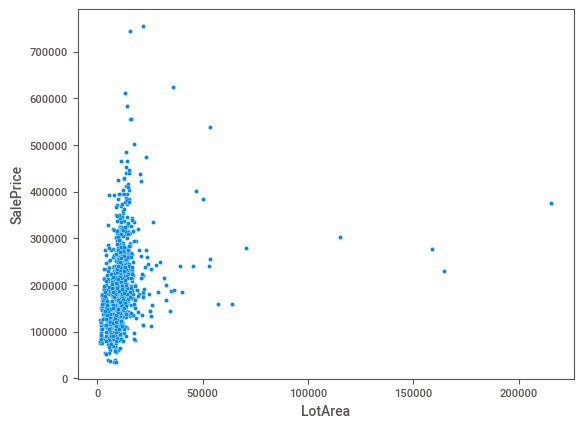

In [39]:
sns.scatterplot(x='LotArea',y='SalePrice',data=data)
plt.show()

* Most of the lot areas are between 0 to 50000 sq.feet which includes most of the saleprice range.

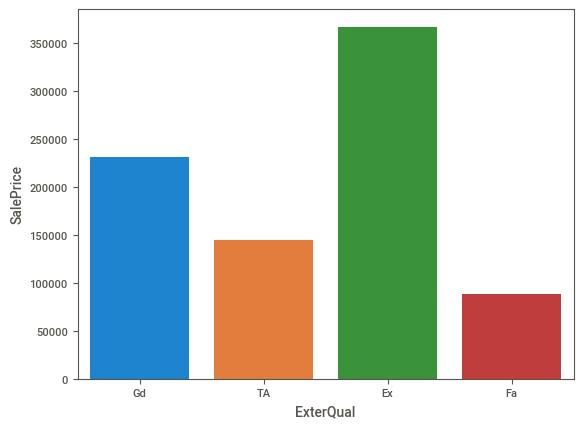

In [40]:
sns.barplot(x='ExterQual',y='SalePrice',data=data,ci=None)
plt.show()

* The highest sale price house have the excellent Exterior material Quality.

# DATA PREPROCESSING AND FEATURE ENGINEERING

In [41]:
# Finding how many numerical columns and categorical columns

num_col = data.select_dtypes(include=['int64','float64']).columns
cat_col=data.select_dtypes(include=['object']).columns

#count the numerical and categorical column
print('Numerical columns:',len(num_col))
print('Categorical columns:',len(cat_col))

Numerical columns: 38
Categorical columns: 43


* From the 81 columns in the dataset, here we have 38 numerical columns and 43 categorical columns  

## 1. CHECK MISSING VALUES

In [42]:
# Missing values
pd.set_option('display.max_rows',None)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

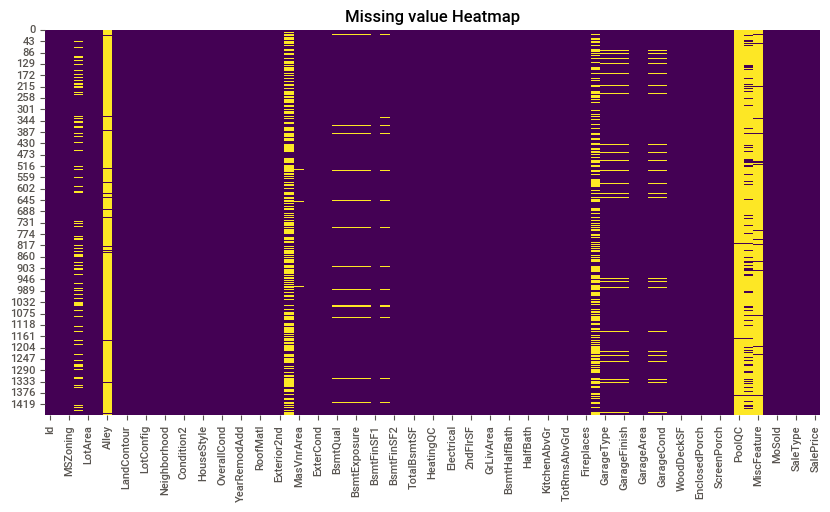

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing value Heatmap")
plt.show()

### Handling Missing values

 * From the above dataset, there are four columns which have more than 1000 missing values. They are Alley,PoolQC, Fence and MiscFeature.
 * Hence, we can drop these four columns and we can impute the missing values of the other columns by various methods. 

In [44]:
drop_col=['Alley','PoolQC','Fence','MiscFeature','Id']
data.drop(columns=drop_col,inplace=True)

In [45]:
data.shape

(1460, 76)

## 2. IMPUTE MISSING VALUES

In [46]:
#finding the numerical columns which have missing values
mis_val=data.isnull().sum()
num_mis = mis_val[data.dtypes!='object']
numcol_mis=num_mis[num_mis>0].index
print("Numerical column with missing values:")
print(numcol_mis)

Numerical column with missing values:
Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [47]:
# Imputing median to these missing values of numerical columns
df1=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
data[df1]=data[df1].fillna(data[df1].median())

* Successfully dropped the missing values columns which have more than 1000 Nan and imputed with median for numerical column missing values.

#### Handling missing values in categorical columns

In [48]:
cat_mis=mis_val[data.select_dtypes(include =['object']).columns]
catcol_mis=cat_mis[cat_mis>0].index
print("categorical columns with missing values:")
print(catcol_mis)
print("No of categorical columns which have missing values:")
print(len(catcol_mis))

categorical columns with missing values:
Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')
No of categorical columns which have missing values:
12


In [49]:
data[catcol_mis].head(10)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA
1,NaN,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
3,NaN,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
5,NaN,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,Unf,TA,TA
6,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA
7,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,RFn,TA,TA
8,NaN,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,Unf,Fa,TA
9,NaN,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,RFn,Gd,TA


### 1. MasVnrType 

In [50]:
# Get the value counts
data.MasVnrType.value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [51]:
# Impute categorical data using mode
data['MasVnrType'] = data['MasVnrType'].replace(np.nan,'None')

In [52]:
# Check missing value after imputation
data['MasVnrType'].isnull().sum()

0

### 2. BsmtQual

In [53]:
# Get the value counts
data.BsmtQual.value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [54]:
# Impute categorical data using mode
data['BsmtQual'] = data['BsmtQual'].replace(np.nan,'TA')

In [55]:
# missing value after imputation
data['BsmtQual'].isnull().sum()

0

### 3. BsmtCond

In [56]:
# Get the value counts
data.BsmtCond.value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [57]:
# Impute categorical data using mode
data['BsmtCond'] = data['BsmtCond'].replace(np.nan,'TA')

In [58]:
data['BsmtCond'].isnull().sum()

0

### 4. BsmtExposure

In [59]:
# Get the value counts
data.BsmtExposure.value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [60]:
# Impute categorical data using mode
data['BsmtExposure'] = data['BsmtExposure'].replace(np.nan,'No')

In [61]:
data['BsmtExposure'].isnull().sum()

0

### 5. BsmtFinType1

In [62]:
# Get the value counts
data.BsmtFinType1.value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [63]:
# Impute categorical data using mode
data['BsmtFinType1'] = data['BsmtFinType1'].replace(np.nan,'Unf')

In [64]:
data['BsmtFinType1'].isnull().sum()

0

### 6. BsmtFinType2

In [65]:
# Get the value counts
data.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [66]:
# Impute categorical data using mode
data['BsmtFinType2'] = data['BsmtFinType2'].replace(np.nan,'Unf')

In [67]:
data['BsmtFinType2'].isnull().sum()

0

### 7. Electrical

In [68]:
# Get the value counts
data.Electrical.value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [69]:
# Impute categorical data using mode
data['Electrical'] = data['Electrical'].replace(np.nan,'SBrkr')

In [70]:
data['Electrical'].isnull().sum()

0

### 8. FireplaceQu

In [71]:
# Get the value counts
data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [72]:
# Impute categorical data using mode
data['FireplaceQu'] = data['FireplaceQu'].replace(np.nan,'Gd')

In [73]:
data['FireplaceQu'].isnull().sum()

0

### 9. GarageType

In [74]:
# Get the value counts
data.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [75]:
# Impute categorical data using mode
data['GarageType'] = data['GarageType'].replace(np.nan,'Attchd')

In [76]:
data['GarageType'].isnull().sum()

0

### 10. GarageFinish

In [77]:
# Get the value counts
data.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [78]:
# Impute categorical data using mode
data['GarageFinish'] = data['GarageFinish'].replace(np.nan,'Unf')

In [79]:
data['GarageFinish'].isnull().sum()

0

### 11. GarageQual

In [80]:
# Get the value counts
data.GarageQual.value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [81]:
# Impute categorical data using mode
data['GarageQual'] = data['GarageQual'].replace(np.nan,'TA')

In [82]:
data['GarageQual'].isnull().sum()

0

### 12. GarageCond

In [83]:
# Get the value counts
data.GarageCond.value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [84]:
# Impute categorical data using mode
data['GarageCond'] = data['GarageCond'].replace(np.nan,'TA')

In [85]:
data['GarageCond'].isnull().sum()

0

In [86]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

* All NaN values have been imputted

## 3. CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA

In [87]:
cat_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Categoricacl columns:"'\n',cat_columns)

Categoricacl columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [88]:
len(cat_columns)

39

In [89]:
data[cat_columns].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


### 1.street

In [90]:
data.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [91]:
data['Street']=data['Street'].map({'Pave':1,'Grvl':2})

### 2.LotShape

In [92]:
data.LotShape.value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [93]:
data['LotShape'] = data['LotShape'].map({'Reg':1,'IR1':2,'IR2':3,'IR3':4})

### 3. LandContour	

In [94]:
data.LandContour.value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [95]:
data['LandContour'] = data['LandContour'].map({'Lvl':1,'Bnk':2,'HLS':3,'Low':4})

### 4.Utilities

In [96]:
data.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [97]:
data['Utilities']=data['Utilities'].map({'AllPub':1,'NoSeWa':2})

### 5. LotConfig

In [98]:
data.LotConfig.value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [99]:
data['LotConfig']=data['LotConfig'].map({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})

### 6.LandSlope

In [100]:
data.LandSlope.value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [101]:
data['LandSlope']=data['LandSlope'].map({'Gtl':1,'Mod':2,'Sev':3})

### 7.Neighborhood

In [102]:
data.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder
data['Neighborhood']=LabelEncoder().fit_transform(data['Neighborhood'])

In [104]:
rem_cat_col = data.select_dtypes(include=['object']).columns.tolist()
print("Remaining Categoricacl columns:"'\n',rem_cat_col)

Remaining Categoricacl columns:
 ['MSZoning', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [105]:
label_encoder = LabelEncoder()

for column in rem_cat_col :
    data[column]=label_encoder.fit_transform(data[column])

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,1,1,1,1,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,1,1,4,1,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,1,1,1,1,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,1,1,2,1,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,1,1,4,1,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


* We have done some manual encoding and label encoding for the conversion of categorical data into numerical data

## Handling Outliers:

In [106]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [107]:
num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

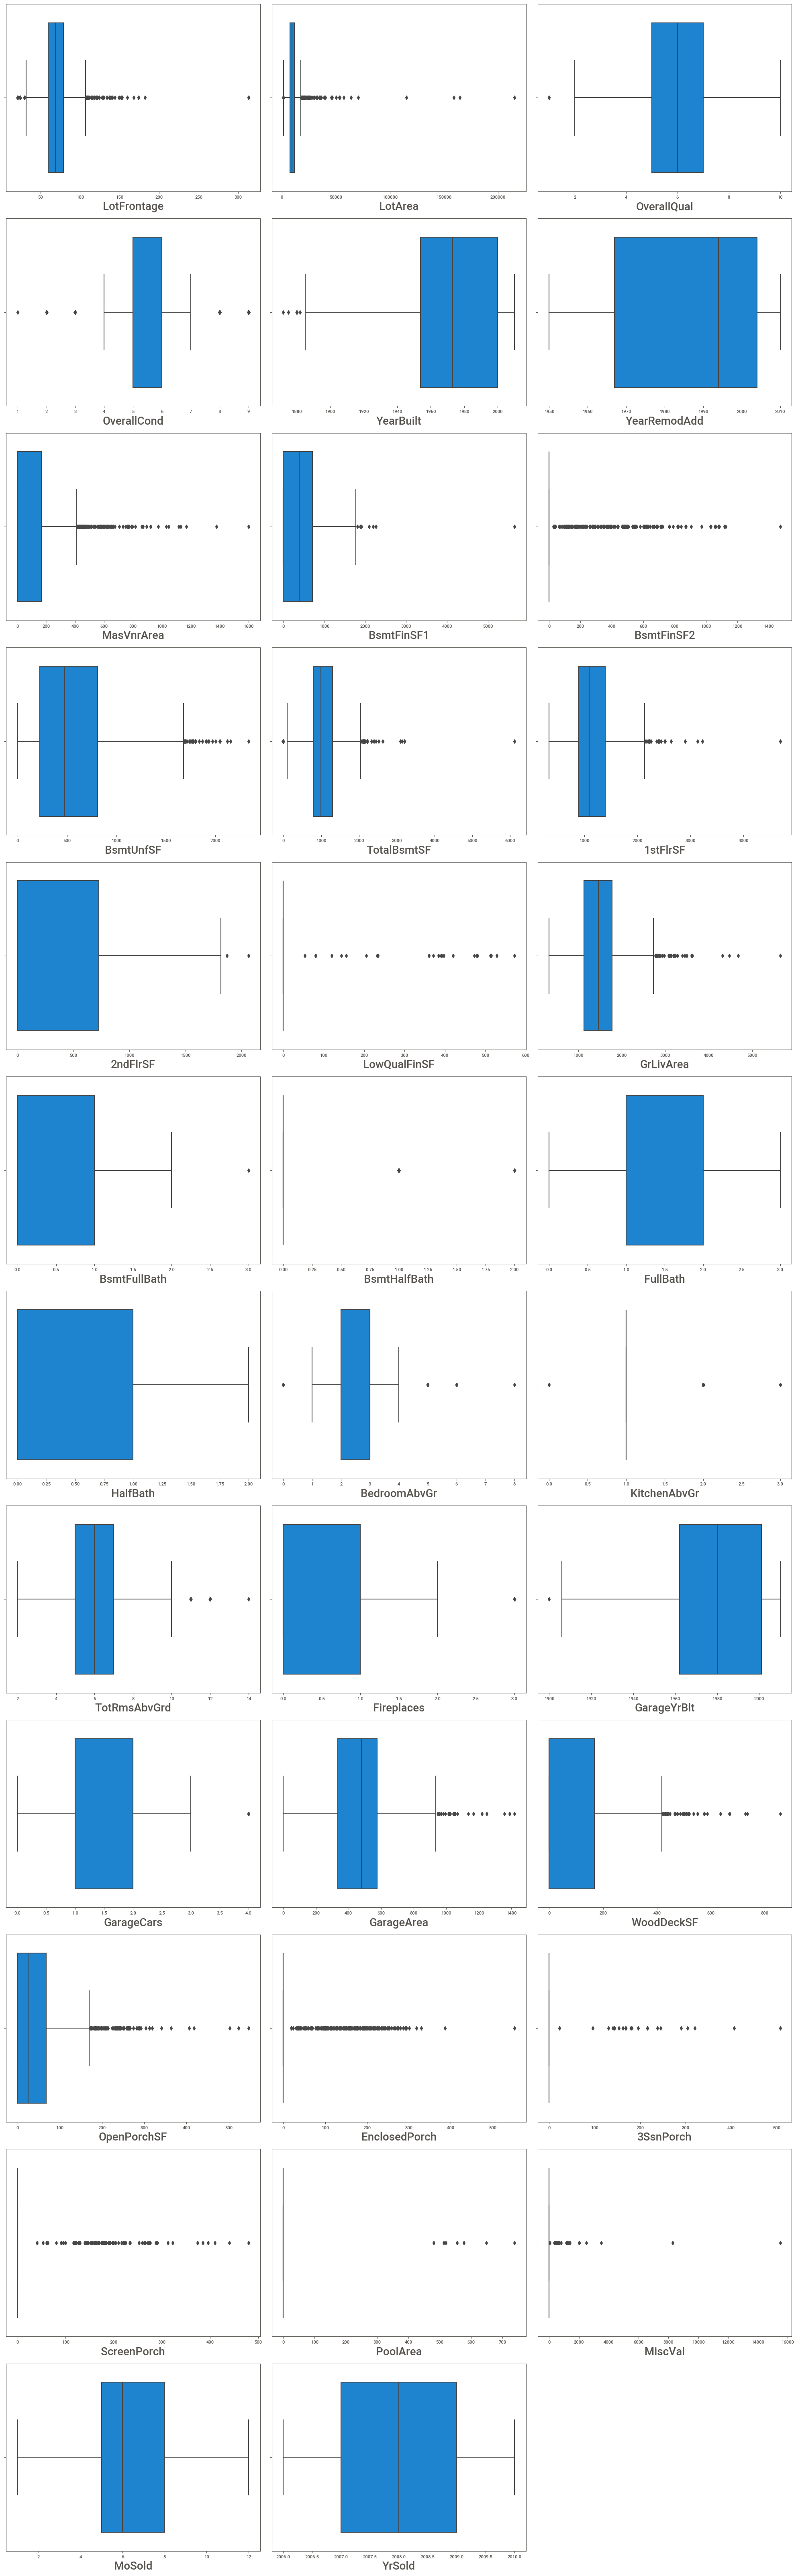

In [108]:
outlier=data[[ 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold' ]]

# Defining the number of columns and rows for subplots
num_cols = 3
num_rows = (len(outlier.columns) - 1)

# Define the figure size based on the number of subplots and desired aspect ratio
fig_width = 20  
fig_height = num_rows * (fig_width / num_cols) * 0.8 
#set the figure size
plt.figure(figsize=(fig_width,fig_height)) 


for i,column in enumerate(outlier.columns,1): 
        plt.subplot(num_rows,num_cols,i) 
        sns.boxplot(x=outlier[column])
        plt.xlabel(column,fontsize=20)  

plt.tight_layout()
plt.show() 


### CHECKING THE DISTRIBUTION BEFORE HANDLE THE OUTLIER

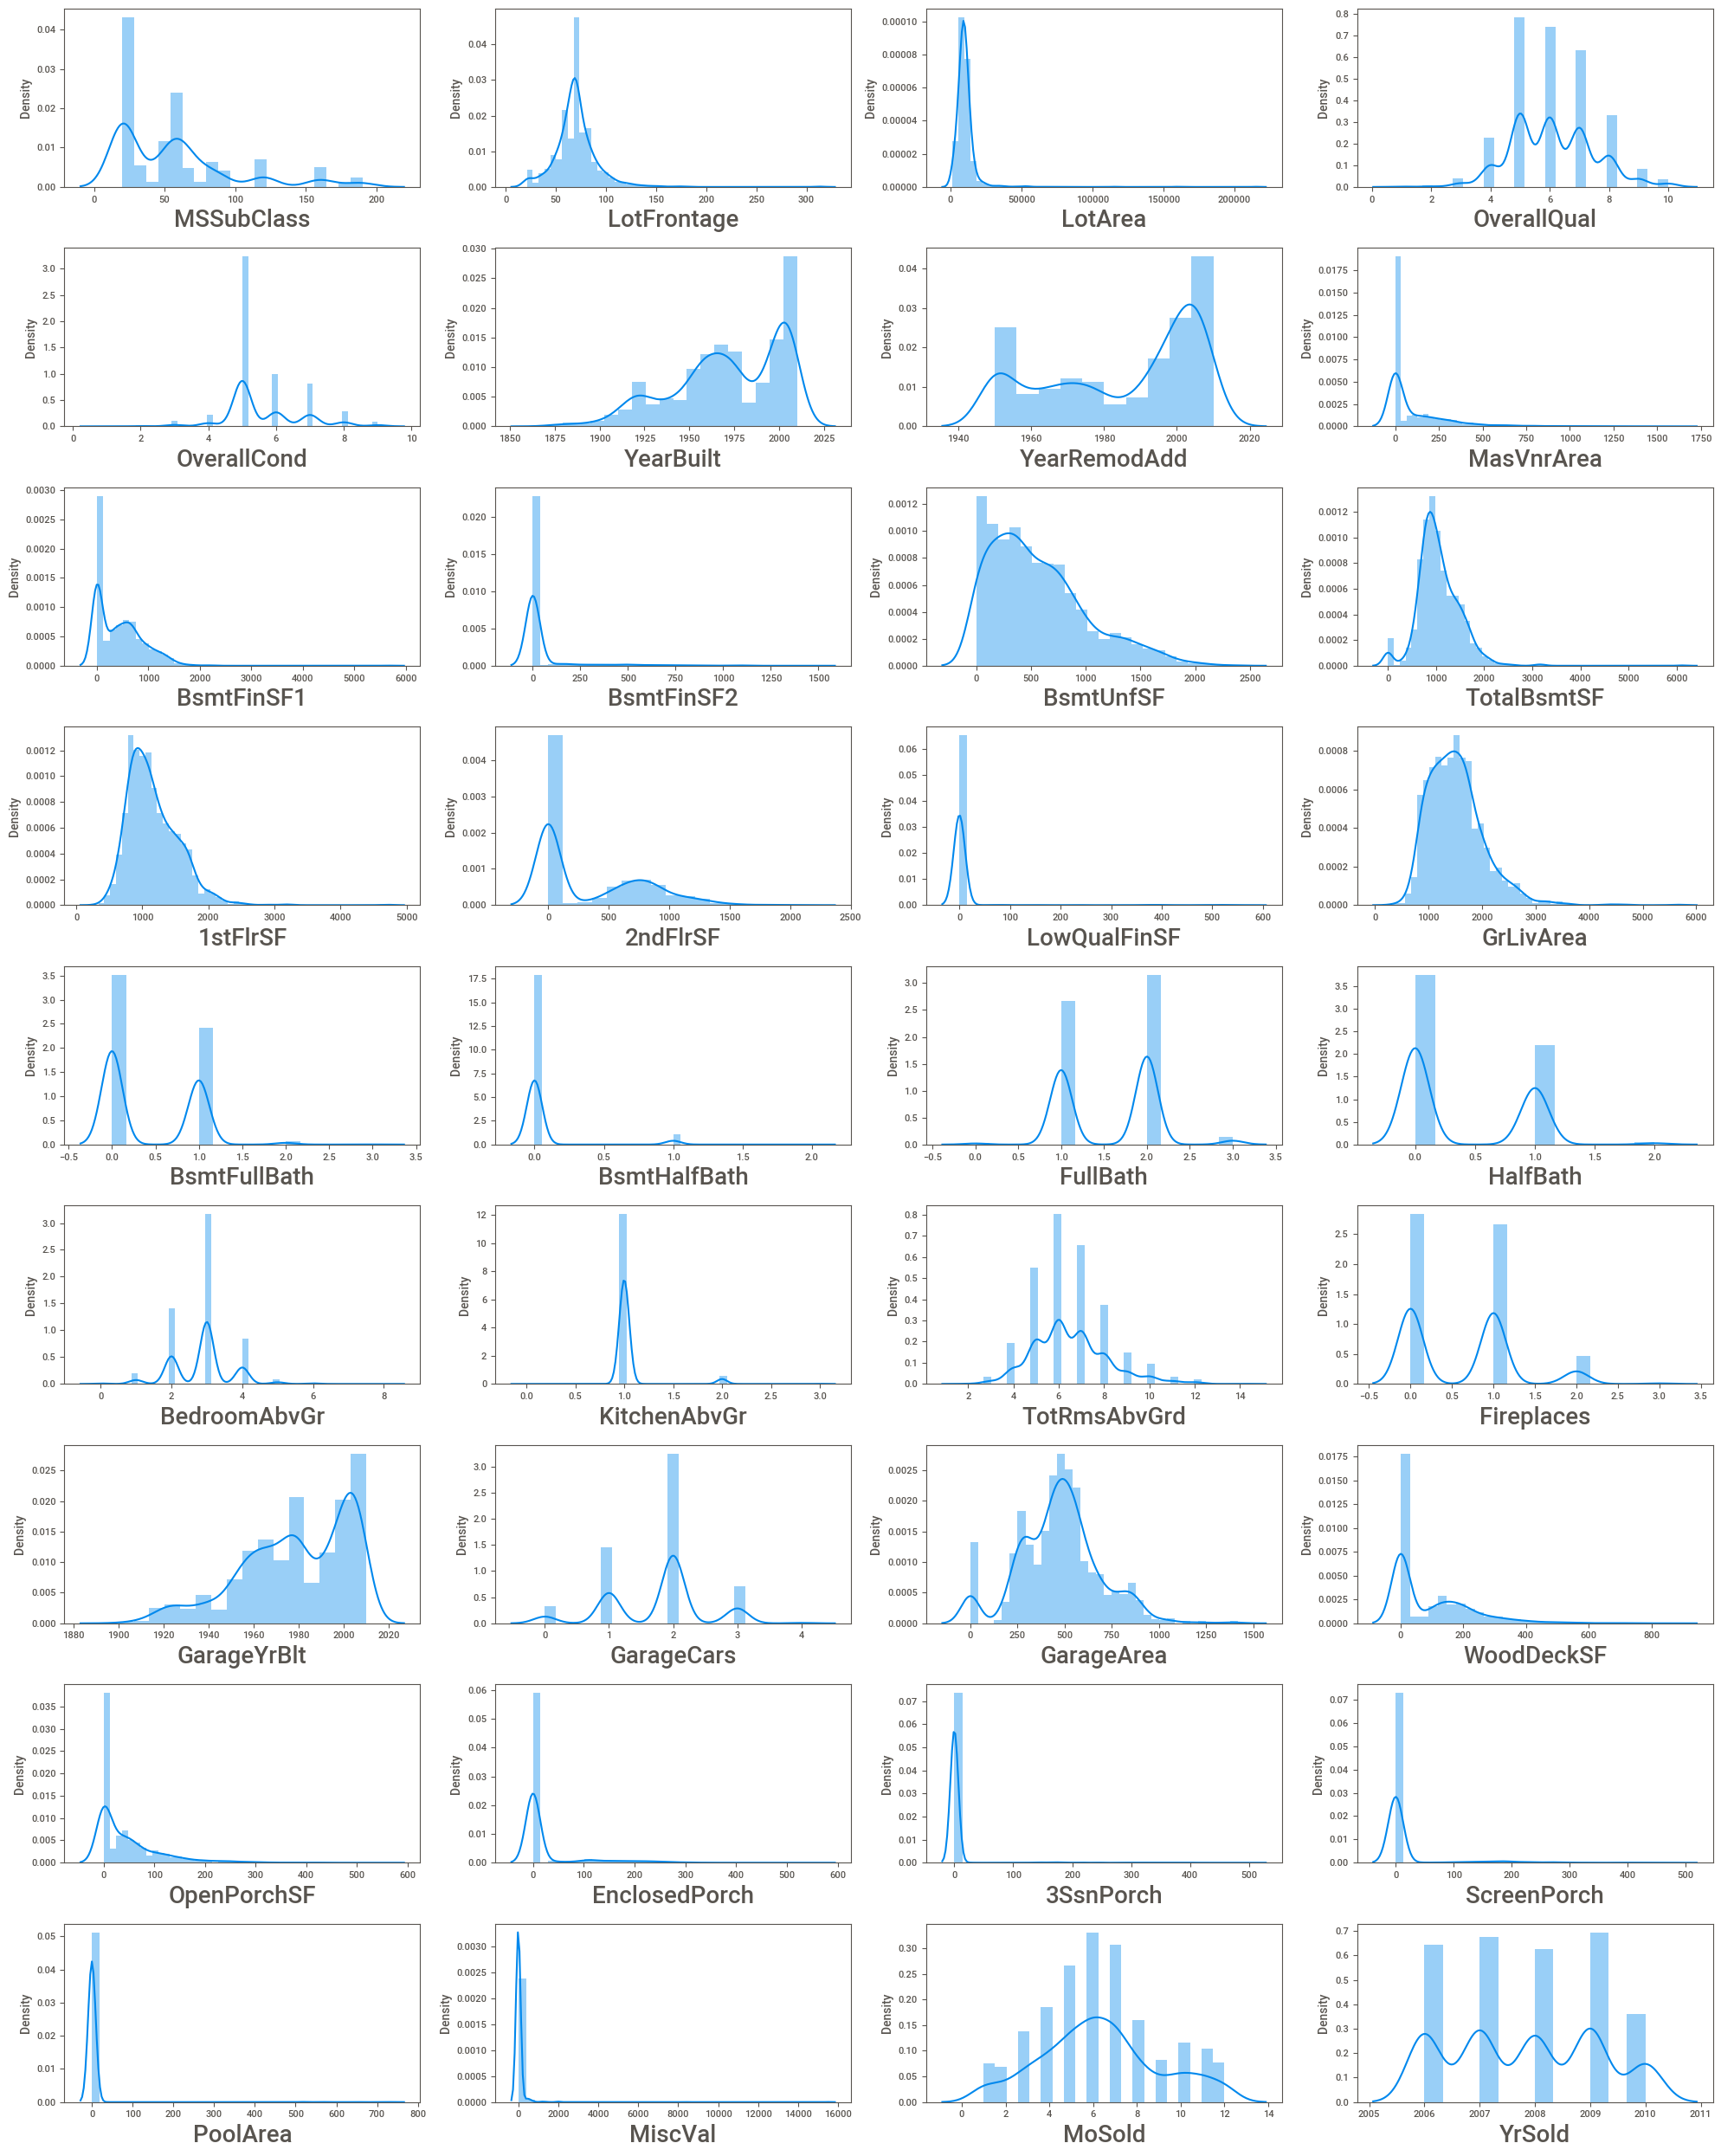

In [109]:
outliers=data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold' ]]

plt.figure(figsize=(20,25))
plotno = 1 # counter

for column in outliers: 
    if plotno<=36:    
        plt.subplot(9,4,plotno) # # plotting 36 graphs (9-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=outliers[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 

### EMPHERICAL RULE OR 3 STANDARD DEVIATION RULE TO DETECT THE OUTLIER

## Handling the outliers:

### 1. LotFrontage

In [110]:
median_lot_frontage = data['LotFrontage'].median()

# Define a threshold for identifying outliers (e.g., values above the 95th percentile)
outlier_threshold = np.percentile(data['LotFrontage'], 95)

# Replace outliers with the median value
data.loc[data['LotFrontage'] > outlier_threshold, 'LotFrontage'] = median_lot_frontage


<Axes: >

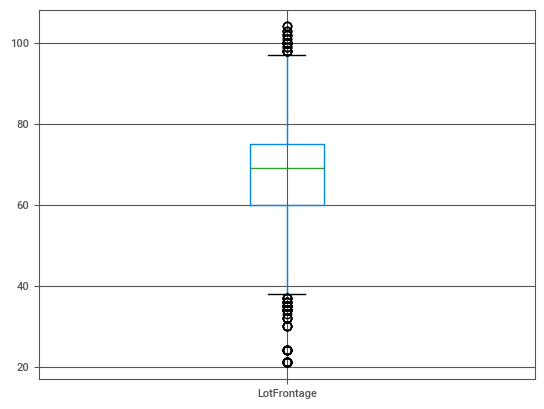

In [111]:
data.boxplot('LotFrontage')

###  Even after imputing median the outliers presisted, Hence we used winsorization technique

In [112]:
from scipy.stats.mstats import winsorize 
data['LotFrontage'] = winsorize (data['LotFrontage'],limits=[0.05,0.05])

<Axes: >

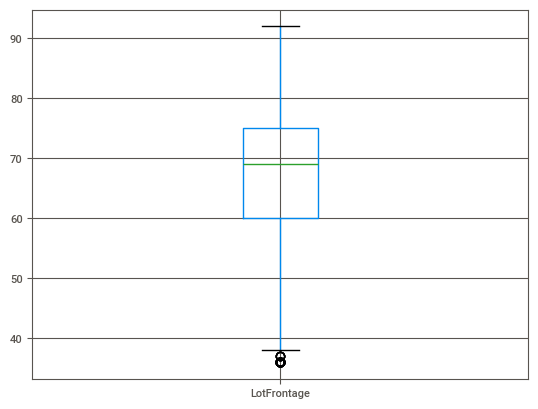

In [113]:
data.boxplot('LotFrontage')

### 2. LotArea

In [114]:
# LotArea: Lot size in square feet

data.LotArea.value_counts()

LotArea
7200      25
9600      24
6000      17
9000      14
8400      14
10800     14
1680      10
7500       9
9100       8
8125       8
6120       8
6240       8
3182       7
7800       6
8450       6
4435       5
10140      5
10000      5
5000       5
4500       5
9750       5
5400       5
10400      5
9900       4
13125      4
6600       4
8800       4
8640       4
9375       4
7000       4
8750       4
7018       4
11250      4
8520       4
10625      4
8544       4
8500       4
11700      4
9120       3
8000       3
11600      3
9084       3
6762       3
7750       3
12090      3
8012       3
3675       3
13891      3
10200      3
8777       3
14115      3
10440      3
2280       3
2117       3
2522       3
10500      3
9920       3
9200       3
8712       3
4426       3
7875       3
11500      3
9400       2
1533       2
9760       2
15611      2
9819       2
5500       2
11340      2
14000      2
13500      2
12342      2
14803      2
12000      2
9060       2
9786       2
8773

<Axes: >

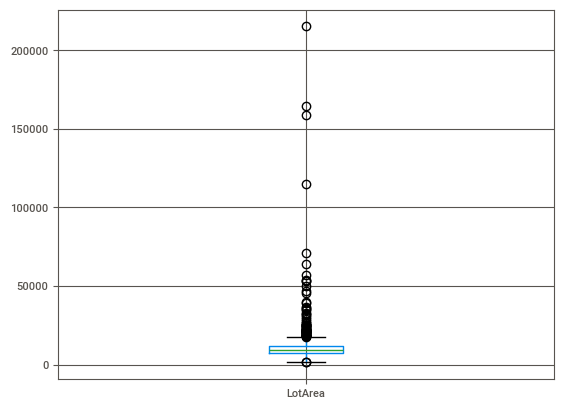

In [115]:
data.boxplot('LotArea')

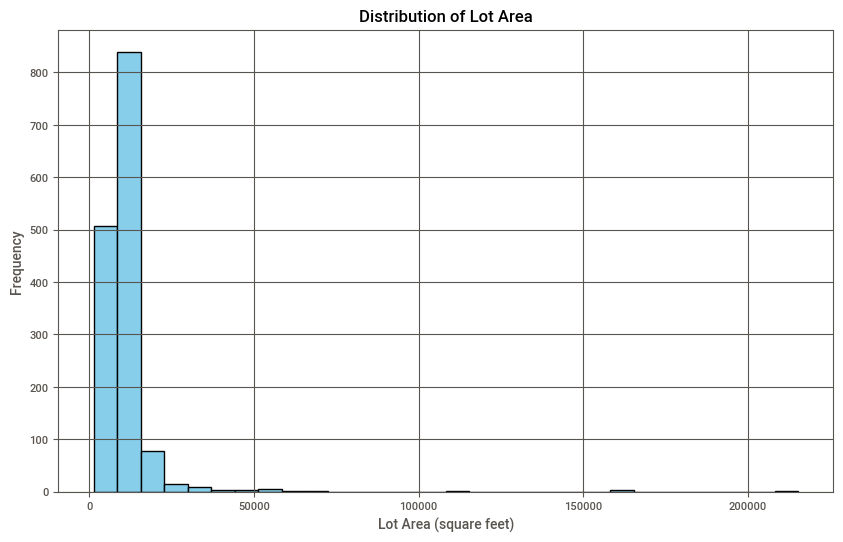

In [116]:
plt.figure(figsize=(10, 6))
plt.hist(data['LotArea'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* After reviewing the histogram and box plot of the 'LotArea' column and considering the description of lot area, we believe that the observed values may indeed represent the original data rather than outliers. Therefore, we have decided not to address any potential outliers present in the dataset.


### 3. OverAll Qual

In [117]:
data.OverallQual.value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

* OverallQual has a review rate of 1 to 10. so it doesn't have an outlier

### 4.OverallCond

In [118]:
data.OverallCond.value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

* Same as OverallQual, Overallcond has the review rating. Hence, it doesn't have an outlier

### 5.YearBuilt

In [119]:
data.YearBuilt.value_counts()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1965    24
2000    24
1970    24
1954    24
1958    24
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961    14
1948    14
1956    14
1969    14
1997    14
1992    13
1953    12
1990    12
1949    12
1973    11
1988    11
1900    10
1974    10
1915    10
1980    10
1984     9
1926     9
1936     9
1979     9
1930     9
1922     8
1975     8
1939     8
1916     8
1928     7
1914     7
1923     7
1924     7
1918     7
1946     7
1935     6
1951     6
1921     6
1945     6
1982     6
1931     6
1986     5
1937     5
1981     5
1991     5
1947     5
1952     5
1985     5
1929     4
1938     4
1983     4
1932     4
1880     4
1919     3


* Since the 'YearBuilt' column represents the original construction date of the houses, it is reasonable to expect some variations and fewer occurrences for certain years, especially if the dataset covers a wide range of years. 
* After reviewing the 'YearBuilt' column and considering the context of our analysis, it appears that there are very few points shown in the box plot, suggesting that there are no significant outliers present. 
* we believe that the data is reasonable and does not require any further handling for outliers. Therefore, we can leave the 'YearBuilt' data as it is for our analysis.


### 6.MasVnrArea

In [120]:
data.MasVnrArea.value_counts()

MasVnrArea
0.0       869
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0    

<Axes: >

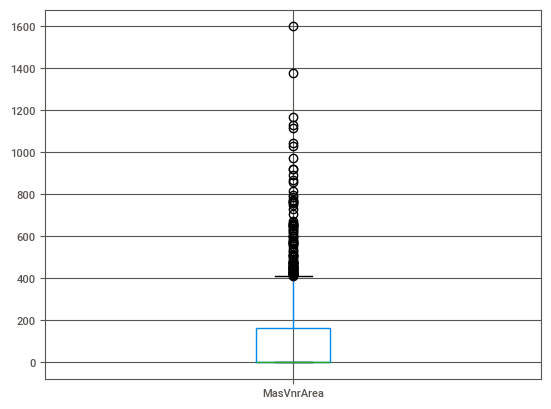

In [121]:
data.boxplot('MasVnrArea')

In [122]:
# Identifying IQR for further analysis
Q1 = data['MasVnrArea'].quantile(0.25)
Q3 = data['MasVnrArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
out_mas = data[(data['MasVnrArea'] < lower_bound) | (data['MasVnrArea'] > upper_bound)]
print("Number of outliers in MasVnrArea:", len(out_mas))


Number of outliers in MasVnrArea: 98


Text(0, 0.5, 'Frequency')

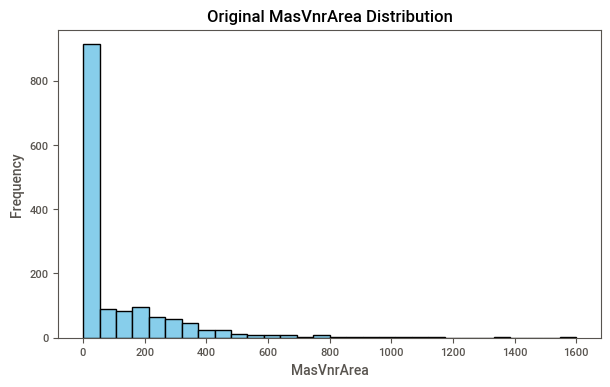

In [123]:
plt.figure(figsize=(7, 4))
plt.hist(data['MasVnrArea'], bins=30, color='skyblue', edgecolor='black')
plt.title('Original MasVnrArea Distribution')
plt.xlabel('MasVnrArea')
plt.ylabel('Frequency')


In [124]:
data['MasVnrArea_log'] = np.log1p(data['MasVnrArea'])

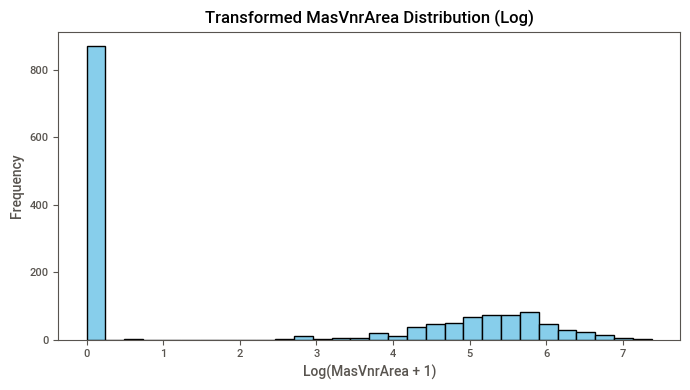

In [125]:
plt.figure(figsize=(7, 4))
plt.hist(data['MasVnrArea_log'], bins=30, color='skyblue', edgecolor='black')
plt.title('Transformed MasVnrArea Distribution (Log)')
plt.xlabel('Log(MasVnrArea + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [126]:
data.drop('MasVnrArea_log', axis=1, inplace=True)

* After performing the log transformation on the 'MasVnrArea' column to handle outliers, we observed that the distribution of the data didn't change significantly. Therefore, we decided to continue using the original 'MasVnrArea' data without the log transformation.

### 7.BsmtFinSF1

In [127]:
data.BsmtFinSF1.value_counts()

BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
20        5
936       5
616       5
560       4
553       4
312       4
400       4
641       4
384       4
360       4
442       4
588       4
600       4
300       4
495       4
1200      4
697       4
655       4
547       4
504       4
428       4
1274      3
685       3
674       3
680       3
624       3
507       3
1300      3
767       3
695       3
625       3
660       3
450       3
120       3
210       3
570       3
375       3
250       3
700       3
816       3
904       3
425       3
569       3
1056      3
786       3
812       3
378       3
247       3
690       3
168       3
1036      3
789       3
672       3
403       3
828       3
626       3
297       3
288       3
28        3
180       3
500       3
656       3
1201      3
456       3
280       3
490       3
643       3
510       3
528       3
633       3
1218      3
659       3
595       3
340       3
336       3
733       3
338       3
565  

In [128]:
Q1 = data['BsmtFinSF1'].quantile(0.25)
Q3 = data['BsmtFinSF1'].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

out_Bsmt = data[(data['BsmtFinSF1'] < lower_bound) | (data['BsmtFinSF1'] > upper_bound)]
print("Number of outliers:", len(out_Bsmt))

Number of outliers: 7


In [129]:
med_bsmt = data['BsmtFinSF1'].median()
data.loc[(data['BsmtFinSF1'] < lower_bound) | (data['BsmtFinSF1'] > upper_bound), 'BsmtFinSF1'] = med_bsmt

<Axes: >

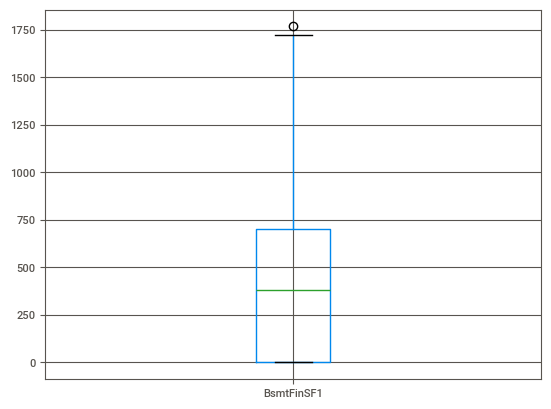

In [130]:
data.boxplot('BsmtFinSF1')

* Outlier imputed successfully

### 8.BsmtFinSF2

<Axes: >

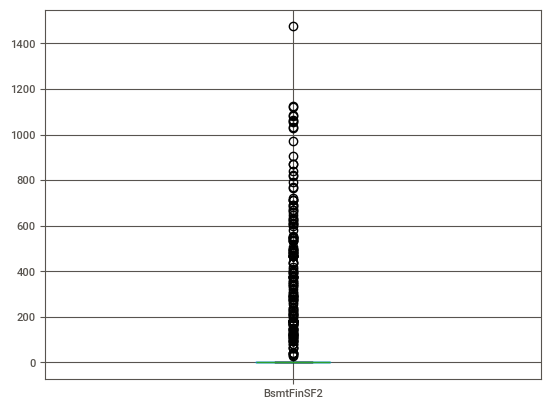

In [131]:
data.boxplot('BsmtFinSF2')

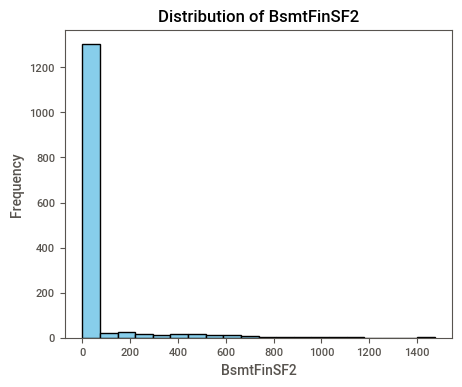

In [132]:
# To view the disstributio of the BsmtFinSF2
plt.figure(figsize=(5,4))
plt.hist(data['BsmtFinSF2'],bins=20,color='skyblue', edgecolor='black')
plt.title("Distribution of BsmtFinSF2")
plt.title('Distribution of BsmtFinSF2')
plt.xlabel('BsmtFinSF2')
plt.ylabel('Frequency')
plt.show()

In [133]:
corr1 = data['BsmtFinSF2'].corr(data['SalePrice'])
print("Correlation between BsmtFinSF2 and SalePrice:", corr1)


Correlation between BsmtFinSF2 and SalePrice: -0.011378121450215136


* Given the low correlation coefficient of -0.011 between 'BsmtFinSF2' and 'SalePrice', indicating a weak linear relationship, and the absence of significant predictive value demonstrated by its highly skewed distribution, we have decided to drop the 'BsmtFinSF2' column from the dataset.
 * Additionally, since 'BsmtFinSF2' does not appear to contribute substantially to the analysis or prediction task at hand, removing it simplifies the dataset without sacrificing meaningful information.

In [134]:
data.drop(columns=['BsmtFinSF2'], inplace=True)


### 9.BsmtUnfSF

In [135]:
# Step 1: Calculate IQR
Q1 = data['BsmtUnfSF'].quantile(0.25)
Q3 = data['BsmtUnfSF'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Step 3: Identify outliers
out_unf = data[(data['BsmtUnfSF'] < lower_bound) | (data['BsmtUnfSF'] > upper_bound)]
print('No. of outliers in BsmtUnfSF:',len(out_unf))

No. of outliers in BsmtUnfSF: 0


* This indicates that the data distribution does not exhibit outliers according to the chosen threshold (i.e, 3). Therefore, you can proceed without any further outlier treatment for the BsmtUnfSF column.

### 10.'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

In [136]:
# Checking correlation for some columns in the data
corr2 = data[['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']].corr()['SalePrice']
print(corr2)

EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
SalePrice        1.000000
Name: SalePrice, dtype: float64


In [137]:
# Drop miscval column because of its negative correlation
data.drop(columns=['MiscVal'],inplace=True)

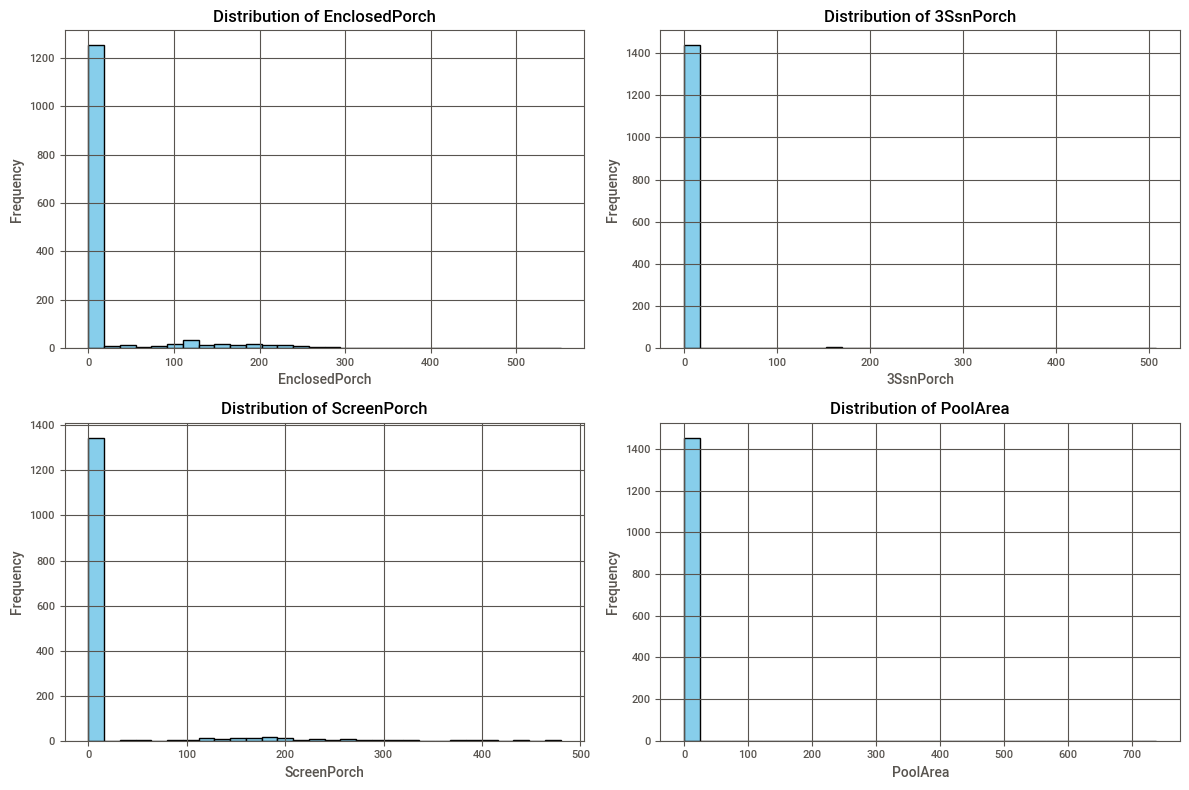

In [138]:

# List of columns
a = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

# Plotting histograms for all columns in a single code block
plt.figure(figsize=(12, 8))

for i, column in enumerate(a, 1):
    plt.subplot(2, 2, i)
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


 * The histograms shows high skewness towards zero for all four columns, it indicates that most of the data points have values close to zero. This can happen if the majority of houses don't have enclosed porches, 3-season porches, screen porches, or pools.
 * So we can keep the data as it is for model performance.

### 11.WoodDeckSF

In [139]:
# Calculate Q1, Q3, and IQR
Q1 = data['WoodDeckSF'].quantile(0.25)
Q3 = data['WoodDeckSF'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Impute outliers using median
med_w = data['WoodDeckSF'].median()
data.loc[data['WoodDeckSF'] < lower_bound, 'WoodDeckSF'] = med_w
data.loc[data['WoodDeckSF'] > upper_bound, 'WoodDeckSF'] = med_w


<Axes: >

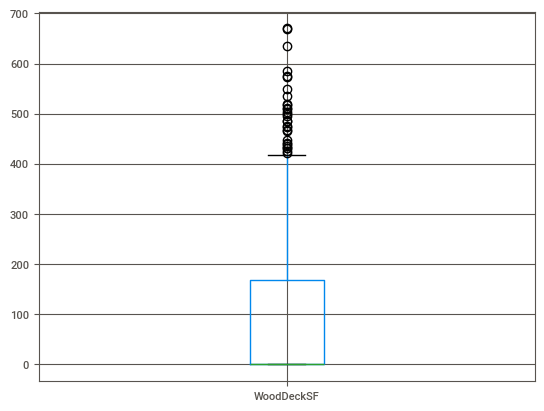

In [140]:
data.boxplot('WoodDeckSF')

### SCALING CONTINOUS VARIABLES

In [141]:
num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [142]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF

* In this project, we observed that using MinMaxScaler to scale the numerical data resulted in a lower R2 score compared to not scaling the data. This could be due to the normalization effect, sensitivity to outliers, algorithm sensitivity, or the specific characteristics of our data. Hence We opted to not using scaling for this dataset.

## Principal Component Analysis(PCA)

* Here, we have total of 81 columns. Hence we used PCA for dimensionality reduction

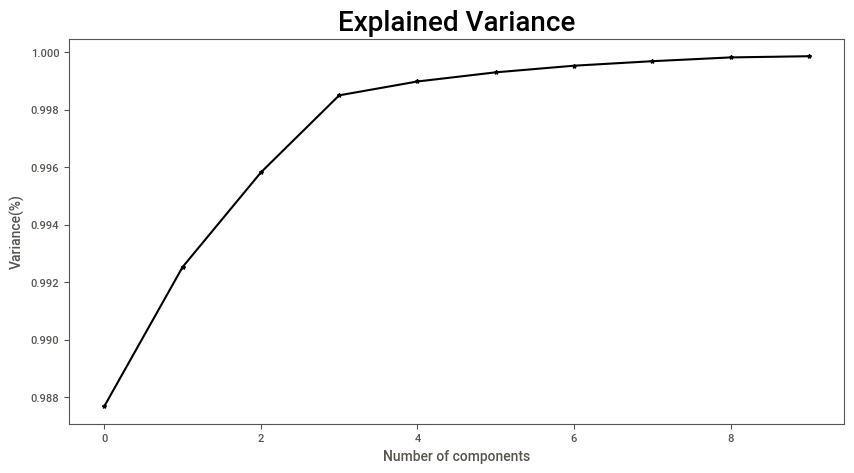

Explained variance ratio: [9.87686405e-01 4.84097108e-03 3.28821425e-03 2.68048659e-03
 4.81359634e-04 3.18020633e-04 2.30602089e-04 1.56540845e-04
 1.31596247e-04 4.14522233e-05]
Total explained variance: 0.9998556489445394


In [146]:
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=10)  

# Fit PCA to the scaled data
X_pca = pca.fit_transform(data.drop(columns=['SalePrice']))  

explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') 
plt.xlabel('Number of components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance',fontsize=20)
plt.show()
print("Explained variance ratio:", explained_variance_ratio)
print("Total explained variance:", sum(explained_variance_ratio))

# Now, X_pca contains the transformed features after PCA
# You can use X_pca for further modeling


In [147]:
import pandas as pd



# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

pca_df['SalePrice'] = data['SalePrice'] 
print(pca_df.head())


           PC1         PC2         PC3         PC4         PC5         PC6  \
0 -2066.102989  -14.044774 -405.421318 -697.301575 -186.948060  -73.115476   
1  -913.425740 -132.058141  689.981630 -345.797005  -75.565777   82.171863   
2   734.320611  106.785720 -521.657263 -360.271547 -179.380007  -98.232493   
3  -969.937325    5.201732 -605.495015  -97.824326   21.357771 -109.000725   
4  3757.681145  651.218572 -538.633549 -539.437334 -215.246376 -267.780579   

          PC7        PC8         PC9        PC10  SalePrice  
0   14.590787  14.798998 -109.357433  -17.476285     208500  
1  -87.395836 -46.378262  197.770612   26.975953     181500  
2  -38.575608  12.994677 -109.322602   -0.271984     223500  
3 -181.366079   0.884370 -111.575348  186.151533     140000  
4   -0.926665 -14.108781   31.396453   -0.077728     250000  


### MODEL CREATION

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X = pca_df[['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']]  # Features
y = pca_df['SalePrice']     # Target variable


In [150]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)


   The make_regression function from the sklearn.datasets module is used to generate synthetic regression datasets.

   * We use synthetic datasets generated by make_regression for various purposes such as Testing Algorithm, Illustrating Concepts, Benchmarking,Prototyping. 
   * Benefits of using make_regression is customization, Reproducibility,Speed and GroundTruth. 


In [151]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 2:-a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      

### Machine Learning Algorithms:
   The goal is to identify the most accurate algorithm for predicting house prices based on the provided data.

The machine learning algorithms we plan to employ include:

   1.Linear Regression
   
   2.Ridge Regression
   
   3.Lasso Regression
   
   4.Random Forest Regressor
   
   5.Gradient Boosting
   
   6.XGBoost
   
   7.Support Vector Regression (SVR):

   

### 1. Linear Regression

In [152]:

from sklearn.linear_model import LinearRegression## Model import

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [153]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_lr = lin_reg.predict(X_test)

### Model Evaluation of Linear Regression

In [154]:
r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
cv_lr = cross_val_score(lin_reg,X_train,y_train,cv=5,scoring='r2')
print("R^2 Score for Linear Regression:", r2)
print("Mean Squared Error for Linear Regression:", mse)
print("Mean Absolute Error for Linear Regression:", mae)
print("Cross-validation score for Linear Regression:",cv_lr.mean())

R^2 Score for Linear Regression: 0.9999925261586983
Mean Squared Error for Linear Regression: 0.010420222653186971
Mean Absolute Error for Linear Regression: 0.08416659922209009
Cross-validation score for Linear Regression: 0.999993109648134


## 2. Ridge Regression:

* Ridge Regression is another linear regression technique that adds a penalty term to the ordinary least squares (OLS) objective function, where the penalty is the squared magnitude of the coefficients multiplied by a constant (alpha).
* It is effective in reducing the variance of the model, especially when the dataset suffers from multicollinearity, where predictor variables are highly correlated with each other.

In [155]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
# Predict on the test set
y_pred_r = ridge.predict(X_test)
# Evaluate the model
mse_r = mean_squared_error(y_test, y_pred_r)
mae_r = mean_absolute_error(y_test, y_pred_r)
r2_r = r2_score(y_test, y_pred_r)
cv_r = cross_val_score(ridge,X_train,y_train,cv=5,scoring='r2')

print("R^2 Score for Ridge:", r2_r)
print("Mean Squared Error for Ridge:", mse_r)
print("Mean Absolute Error for Ridge:", mae_r)
print("Cross validation score for Rodge:",cv_r.mean())

R^2 Score for Ridge: 0.9997532746238247
Mean Squared Error for Ridge: 0.3439908943949251
Mean Absolute Error for Ridge: 0.4972169519650211
Cross validation score for Rodge: 0.9996153038577618


## 3.Lasso Regression

* Lasso Regression is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) objective function, where the penalty is the absolute value of the coefficients multiplied by a constant (alpha).
* It is particularly useful when dealing with high-dimensional datasets with many features, as it can automatically select a subset of the most relevant features while reducing overfitting.

In [156]:
from sklearn.linear_model import Lasso
# Initialize and fit the Lasso Regression model
lasso = Lasso(alpha=10) 
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred_l = lasso.predict(X_test)

# Evaluate the model
mse_l = mean_squared_error(y_test, y_pred_l)
mae_l = mean_absolute_error(y_test, y_pred_l)
r2_l = r2_score(y_test, y_pred_l)
cv_l = cross_val_score(lasso,X_train,y_train,cv=5,scoring='r2')

print("R^2 Score for Lasso:", r2_l)
print("Mean Squared Error for Lasso: ", mse_l)
print("Mean Absolute Error for Lasso:", mae_l)
print("Cross validation score for Lasso:",cv_l.mean())

R^2 Score for Lasso: 0.912479756816096
Mean Squared Error for Lasso:  122.0229844096078
Mean Absolute Error for Lasso: 9.551359513917632
Cross validation score for Lasso: 0.9075759419384228


## 4.Random Forest Regressor

In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, data['SalePrice'], test_size=0.2, random_state=42)

# Instantiate Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate performance metrics
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
cv_rf = cross_val_score(rf_regressor,X_train,y_train,cv=5,scoring='r2')

# Print the performance metrics
print("R^2 Score for RandomForest Regressor:", r2_rf)
print("Mean Squared Error for RandomForest Regressor:", mse_rf)
print("Mean Absolute Error for RandomForest Regressor:", mae_rf)
print("Cross validation for RandomForest:",cv_rf.mean())


R^2 Score for RandomForest Regressor: 0.7747751194910721
Mean Squared Error for RandomForest Regressor: 1727548303.478218
Mean Absolute Error for RandomForest Regressor: 24847.961952054797
Cross validation for RandomForest: 0.7032197588295975


### Hyper parameter Tuning for RandomForest Regressor

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters found during grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Refit the model with the best parameters on the entire training set
best_rf_regressor = RandomForestRegressor(random_state=42, **best_params)
best_rf_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred_rfr = best_rf_regressor.predict(X_test)
r2_rfr = r2_score(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

print("R^2 Score:", r2_rfr)
print("Mean Squared Error:", mse_rfr)
print("Mean Absolute Error:", mae_rfr)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
R^2 Score: 0.775418917439453
Mean Squared Error: 1722610163.2026188
Mean Absolute Error: 24685.58210532157


### Cross validation technique for RandomForest Regressor 

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.68564173 0.70018468 0.6547879  0.67635522 0.79912927]
Mean Cross-Validation Score: 0.7032197588295975


## 5. Gradient Boosting Regressor

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Instantiate Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Perform cross-validation
cv_scores = cross_val_score(gb_regressor, X_train, y_train, cv=5, scoring='r2')

# Fit the model
gb_regressor.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_regressor.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)


# Print evaluation metrics
print("R^2 Score for GB:", r2_gb)
print("Mean Squared Error for GB:", mse_gb)
print("Mean Absolute Error for GB:", mae_gb)
print("Cross-Validation Scores for GB:", cv_scores)
print("Mean Cross-Validation Score for GB:", cv_scores.mean())


R^2 Score for GB: 0.7728196367354104
Mean Squared Error for GB: 1742547494.1066725
Mean Absolute Error for GB: 24582.007649208317
Cross-Validation Scores for GB: [0.67322513 0.7050916  0.62819603 0.67992602 0.75923935]
Mean Cross-Validation Score for GB: 0.6891356250518025


### 6. XGBoost

In [161]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [162]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # Objective for regression task
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
cv_xgb =cross_val_score(xgb_model,X_train,y_train,cv=5,scoring='r2')

print("R^2 Score for XGBoost:", r2_xgb)
print("Mean Squared Error for XGBoost :", mse_xgb)
print("Mean Absolute Error for XGBoost:", mae_xgb)
print("Cross validation Score for XGBoost:",cv_xgb.mean())


## Hyper Parameter Tuning for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


In [ ]:
xgb_reg = xgb.XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100)
xgb_reg.fit(X_train, y_train)
y_pred_xreg = xgb_reg.predict(X_test)
r2_xreg = r2_score(y_test, y_pred_xreg)
mse_xreg = mean_squared_error(y_test, y_pred_xreg)
mae_xreg = mean_absolute_error(y_test, y_pred_xreg)
cv_xreg =cross_val_score(xgb_reg,X_train,y_train,cv=5,scoring='r2')

print("After tuning of XGBoost:")
print("R^2 Score:", r2_xreg)
print("Mean Squared Error:", mse_xreg)
print("Mean Absolute Error:", mae_xreg)
print("Cross validation score :", cv_xreg.mean())

## 7. Support vector Regression

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=0.1,epsilon=0.1,gamma='scale')  # Radial Basis Function (RBF) kernel is commonly used
svr.fit(X_train, y_train)


In [ ]:
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test,y_pred_svr)
cv_svr = cross_val_score(svr,X_train,y_train,cv=5,scoring='r2')

print("R^2 score for SVR: ", r2_svr)
print("Mean Squared Error for SVR:",mse_svr)
print("Mean Absoulte Error for SVR:", mae_svr)
print("Cross validation score for SVR:",cv_svr.mean())

## Model comparison Report:


In [ ]:
results = {
    'Model': ['Linear', 'Ridge', 'Lasso', 'RF', 'RF after tuning', 'Gradient Boosting', 'XGBoost', 'XGB after tuning', 'SVR'],
    'R2': [0.999, 0.999, 0.912, 0.774, 0.7754, 0.7694, 0.7295, 0.7767, -0.0249],
    'MSE': [0.104, 0.343, 122.022, 1727548303.47, 1722610163.20, 1768464773.47, 2074244392.99, 1712250727.81, 7861480443.1],
    'MAE': [0.084, 0.497, 9.55, 24847, 24685.58, 24644.67, 26466.472, 24846.34, 59566.27],
    'Cv score': [0.6547,0.6547,0.6547, 0.7032, 0.7032, 0.6909, 0.6819,0.7058,-0.0525]
}

df_results = pd.DataFrame(results)

print(df_results)


   * __Linear Regression and Ridge Regression__ seem to perform very well, with high R2 scores close to 1 and low MSE and MAE values.
   * __Lasso Regression__ also performs reasonably well but has slightly lower R2 score compared to linear and ridge regression.
   * __Random Forest (RF) and Gradient Boosting(GB)__ have moderate R2 scores and relatively high MSE and MAE values. After tuning also, there is not much change. 
   * __XGBoost__ initially performs worse than Random Forest and Gradient Boosting, but after tuning, its performance improves significantly, with a higher R2 score and lower MSE and MAE values.
   * __Support Vector Regression(SVR)__ performs poorly compared to other models, with a negative R2 score indicating that it performs worse than a constant model predicting the mean of the target variable. This suggests that the SVR model might not be suitable for this dataset.


## Conclusion:

   * For the task of predicting house prices based on the given features, linear and ridge regression models outperform other regression techniques.These models provide highly accurate predictions with minimal error, making them suitable choices for this prediction task. Further fine-tuning of parameters and feature engineering may enhance the performance of ensemble methods like random forest and gradient boosting.
   * However, SVR appears to be unsuitable for this particular dataset.

   * The most suitable model for predicting house prices in this dataset is Linear Regression. It demonstrates the highest R2 score close to 1, indicating a strong relationship between the predictors and the target variable. Additionally, it exhibits the lowest mean squared error (MSE) and mean absolute error (MAE), implying accurate predictions and a good fit to the data.



### Task3:- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.

__1.Budget Consideration:__
  * Prioritize houses that fall within the customer's budget range to ensure financial feasibility.
  
__2.Location Preferences:__
  * Identify preferred neighborhoods or areas based on factors such as proximity to work, schools, amenities, and public transportation.
   * Consider the safety, crime rate, and overall livability of the neighborhood.

__3.Property Features:__
  * Determine the desired property features such as the number of bedrooms, bathrooms, square footage, and additional amenities (e.g., backyard, garage, swimming pool).Evaluate the condition of the property, including any necessary repairs or renovations required.

__4.Future Growth Potential:__
 *  Research upcoming developments, infrastructure projects, or urban revitalization initiatives in the chosen area to assess its growth potential and property value appreciation.

__5.Home Inspection:__
  * Conduct a thorough home inspection to identify any structural issues, maintenance requirements, or hidden defects that may affect the property's value or safety.

__6.Negotiation and Documentation:__
   * Engage in negotiations with sellers to secure the best possible deal, taking into account factors such as property condition, market value, and financing terms.
   * Ensure all legal and contractual aspects are properly documented, including purchase agreements, loan agreements, and property titles.

__7.Future Planning:__
   * Consider long-term factors such as resale potential, property appreciation, and future housing needs when making purchasing decisions.

### Challenges Faced:

In [ ]:
1. Selecting the most relevant features from a large pool was challenging reason why dimensionality reduction (PCA)  was deployed.
2. Extreme values for some features skewed our model.We had to pay attention to details in Outlier handling.
   All strategies including winsorization and dropping of columns were utilized.
3. Choosing the best algorithm from the different regression algorithms and Understanding how features contributed 
to predictions were both demanding and attention to details was key  .
